N = 100
*** DEATH RADIUS INCREASED TO 30 ***
*** SPAWN OVERLAP ***
*** DEATH RADIUS INCREASED TO 35 ***
N = 200
*** DEATH RADIUS INCREASED TO 40 ***
*** DEATH RADIUS INCREASED TO 45 ***
N = 300
N = 400
*** DEATH RADIUS INCREASED TO 50 ***
*** DEATH RADIUS INCREASED TO 55 ***
N = 500
*** DEATH RADIUS INCREASED TO 60 ***
N = 600
*** DEATH RADIUS INCREASED TO 65 ***
*** SPAWN OVERLAP ***
*** SPAWN OVERLAP ***
*** SPAWN OVERLAP ***
*** DEATH RADIUS INCREASED TO 70 ***
N = 700
*** SPAWN OVERLAP ***
*** DEATH RADIUS INCREASED TO 75 ***
N = 800
N = 900
*** SPAWN OVERLAP ***
*** DEATH RADIUS INCREASED TO 80 ***
N = 1000
N = 1100
*** SPAWN OVERLAP ***
*** DEATH RADIUS INCREASED TO 85 ***
N = 1200
*** DEATH RADIUS INCREASED TO 90 ***
N = 1300
N = 1400
*** DEATH RADIUS INCREASED TO 95 ***
N = 1500
*** DEATH RADIUS INCREASED TO 100 ***
N = 1600
*** DEATH RADIUS INCREASED TO 105 ***
N = 1700
N = 1800
*** DEATH RADIUS INCREASED TO 110 ***
*** DEATH RADIUS INCREASED TO 115 ***
N = 1900
*** DEATH RADI

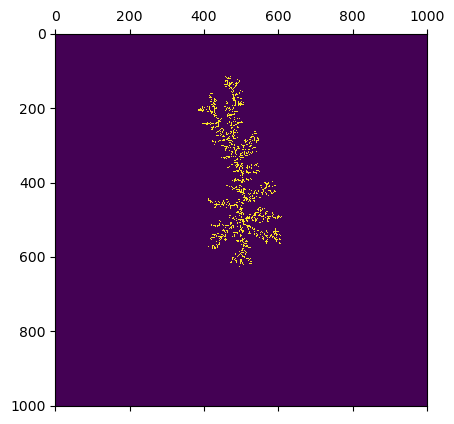

In [95]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

t0 = time.time()
particles = 1
part_tot = 10000
size = 1001 #size of the grid, must be odd for a center
x0 = int((size - 1) / 2)
e_radius = 15 #edge radius
d_radius = 25 # death radius
tree = np.zeros([size, size]) # n X n array means array center is [(n-1)/2,(n-1)/2] when n is odd
tree[x0, x0] = 1
#print("Initial Tree:\n", tree)
spawn_overlap = 0

def Spawn():
    rand1 = random.randrange(360)
    angle = rand1 * np.pi / 180
    if 90 > rand1 >= 0:
        x = -e_radius * np.cos(angle) - x0
        y = e_radius * np.sin(angle) - x0
    if 180 > rand1 >= 90:
        x = e_radius * np.cos(angle) - x0
        y = -e_radius * np.sin(angle) - x0
    if 270 > rand1 >= 180:
        x = -e_radius * np.cos(angle) - x0
        y = e_radius * np.sin(angle) - x0
    if 360 > rand1 >= 270:
        x = e_radius * np.cos(angle) - x0
        y = -e_radius * np.sin(angle) - x0
    #print("x =", round(x), "| y =", round(y))
    return round(x), round(y)

i=0
#print(tree)

while particles < part_tot:
    x = 0
    y = 0
    x, y = Spawn()
    if tree[x, y] == 1:
        spawn_overlap += 1
        print("*** SPAWN OVERLAP ***")
        if spawn_overlap > 5000:
            break
    else:
        tree[x, y] = 1
        #print("##############################################################")
        #print("##############################################################")
        #print("##############################################################")
        #print(tree)
        #print("##############################################################")
        #print("##############################################################")
        #print("##############################################################")
        while i < 1:
            if np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > d_radius:
                tree[x,y] = 0
                #print("DEAD***********************************************")
                break
            elif tree[x + 1, y] == 1 or tree[x - 1, y] == 1 or tree[x, y + 1] == 1 or tree[x, y - 1] == 1:
                particles += 1
                if (particles / 100) == int(particles / 100):
                    print("N =", particles)
                if d_radius > np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > e_radius and d_radius < x0:
                    e_radius += 5
                    d_radius += 5
                    print("*** DEATH RADIUS INCREASED TO", d_radius, "***")
                break
            else:
                #print("##############################################################")
                
                rand2 = random.randrange(4)
                if rand2 == 0:
                    tree[x, y] = 0
                    x += 1
                    tree[x, y] = 1
                    #print("down")
                elif rand2 == 1:
                    tree[x, y] = 0
                    x -= 1
                    tree[x, y] = 1
                    #print("up")
                elif rand2 == 2:
                    tree[x, y] = 0
                    y += 1
                    tree[x, y] = 1
                    #print("right")
                elif rand2 == 3:
                    tree[x, y] = 0
                    y -= 1
                    tree[x, y] = 1
                    #print("left")
                
                #print(tree)
                #i+=1
                #print("i =", i)
    #print("\n\n", tree)
t1 = time.time()
hours = int((t1 - t0) / 3600)
minutes = int(((t1 - t0) / 3600 - hours) * 60)
seconds = int(((((t1 - t0) / 3600 - hours) * 60) - minutes) * 60)
print("*** TIME ELAPSED :", hours, "HOURS,", minutes, "MINUTES, AND", seconds, "SECONDS ***")
print("*** TOTAL PARTICLES =", particles, " ***")
plt.matshow(tree)

8348


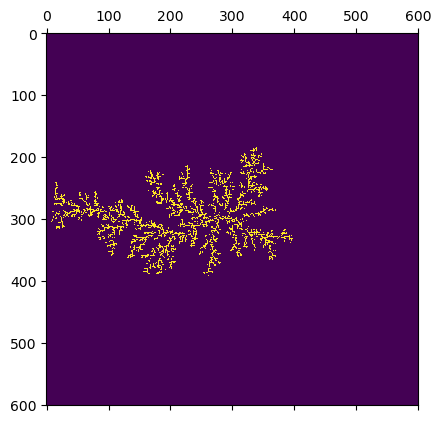

In [88]:
print(particles)
plt.matshow(tree)
#plt.matshow(tree[225:535, 0:535])

In [108]:
Sum = 0
count = 0
i = 0
j = 0

"""
newArr = np.zeros([particles, size, size])

for i in tree:  
    for j in tree:
        if tree[i,j] == 1:
            newArr[count, i, j] = 1
            count +=1
count = 0
"""

#radArr = np.zeros([size,size])

for count in tree:
    if tree[i,j] == 1:
        rad1 = 0
        rad2 = 0
        particlenum = 0
        rad1 = np.sqrt((i + x0)*(i + x0) + (j + x0)*(j + x0))
    for i in tree:  
        for j in tree:
            if tree[i,j] == 1 and rad1 != np.sqrt((i + x0)*(i + x0) + (j + x0)*(j + x0)):
                rad2 = np.sqrt((i + x0)*(i + x0) + (j + x0)*(j + x0))
                if rad1 > rad2:
                    #radArr[i,j] = rad2
                    particlenum += 1
                count += 1
    Sum += rad1 / particlenum


IndexError: arrays used as indices must be of integer (or boolean) type

In [123]:
Sum = 0
count = 0
countnum = 0
particlenum = 0
i = 0
j = 0
rad1 = 0
rad2 = 0

while count < particles:
    countnum = 0
    while countnum < particles:
        for i in range(len(tree)):
            for j in range(len(tree[i])):
                if countnum <= count and tree[i,j] == 1:
                    rad1 = np.sqrt((i + x0)*(i + x0) + (j + x0)*(j + x0))
                    countnum += 1
                elif tree[i,j] == 1 and rad1 != np.sqrt((i + x0)*(i + x0) + (j + x0)*(j + x0)):
                    rad2 = np.sqrt((i + x0)*(i + x0) + (j + x0)*(j + x0))
                    if rad1 > rad2:
                        #radArr[i,j] = rad2
                        particlenum += 1
                    countnum += 1
        if particlenum == 0:
            print("BAD")
            particlenum += 100000000
        else:
            Sum += rad1*rad1 / (particlenum*particlenum)
            count += 1
            print(Sum, particlenum, count)
            particlenum = 0
print(Sum)

536.2869637650978 49 1
962.3484513684036 55 2
1297.9491277471757 62 3
1709.0923037675839 56 4
2005.5257289282818 66 5
2229.293215077866 76 6
2478.479364769224 72 7
2670.8797216996227 82 8
2841.961899001776 87 9
2866.3789062847727 232 10
2887.778522569892 248 11
3037.6390844845646 93 12
3060.476653929009 240 13
3182.766125132704 103 14
3267.3923608246914 124 15
3288.973914365972 247 16
3305.006074523313 287 17
3480.0682703048165 86 18
3620.766729506205 96 19
3736.3413112078783 106 20
3813.40876682918 130 21
3833.362074222176 257 22
3851.07111365649 273 23
3866.680046002589 291 24
3880.105793497416 314 25
3983.7270466861914 112 26
4068.3879467902498 124 27
4138.871781132811 136 28
4157.656045995751 265 29
4174.627385007326 279 30
4189.229972175238 301 31
4201.851466612062 324 32
4293.727464069869 119 33
4370.826694839099 130 34
4388.673202192041 272 35
4404.726535363501 287 36
4418.417874369508 311 37
4486.901911336532 138 38
4542.698100836297 153 39
4589.600392062229 167 40
4619.1110724

KeyboardInterrupt: 